# 3. Exploratory Data Analysis — UK Housing
**Worked on by:** Marin Janushaj  
**Goal:** Explore housing price trends, patterns, and relationships between key variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet("../data/clean/uk_housing_clean.parquet")
df.head()

,transaction_id,price,date,type,is_new,duration,town,district,county,category,record_status
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A


In [2]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df[["date", "year", "month"]].head()

,date,year,month
0,1995-08-18,1995,8
1,1995-08-09,1995,8
2,1995-06-30,1995,6
3,1995-11-24,1995,11
4,1995-06-23,1995,6


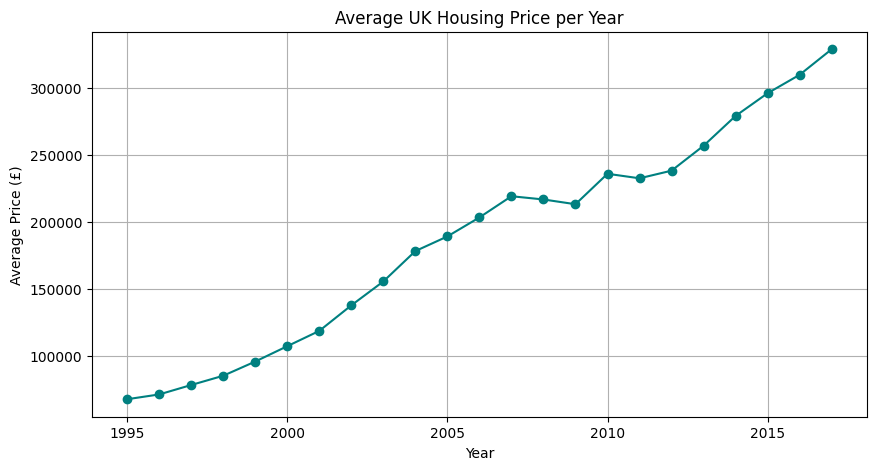

In [3]:
price_by_year = df.groupby("year")["price"].mean()

plt.figure(figsize=(10,5))
price_by_year.plot(marker='o', color='teal')
plt.title("Average UK Housing Price per Year")
plt.ylabel("Average Price (£)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

/var/folders/cd/pyr3v6yx6hn7c56ncf7_24nh0000gn/T/ipykernel_3337/3855714440.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_type.values, y=avg_price_type.index, palette="Blues_d")


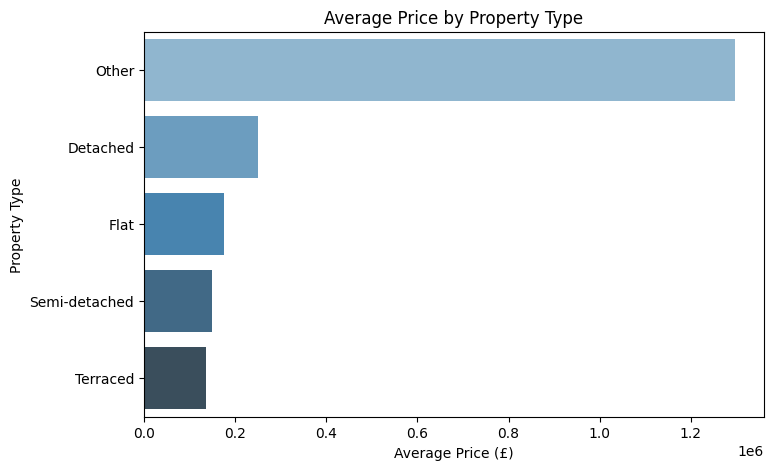

In [4]:
type_map = {"D": "Detached", "S": "Semi-detached", "T": "Terraced", "F": "Flat", "O": "Other"}
df["type_full"] = df["type"].map(type_map)

avg_price_type = df.groupby("type_full")["price"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_price_type.values, y=avg_price_type.index, palette="Blues_d")
plt.title("Average Price by Property Type")
plt.xlabel("Average Price (£)")
plt.ylabel("Property Type")
plt.show()

/var/folders/cd/pyr3v6yx6hn7c56ncf7_24nh0000gn/T/ipykernel_3337/3982635331.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counties.values, y=top_counties.index, palette="rocket")


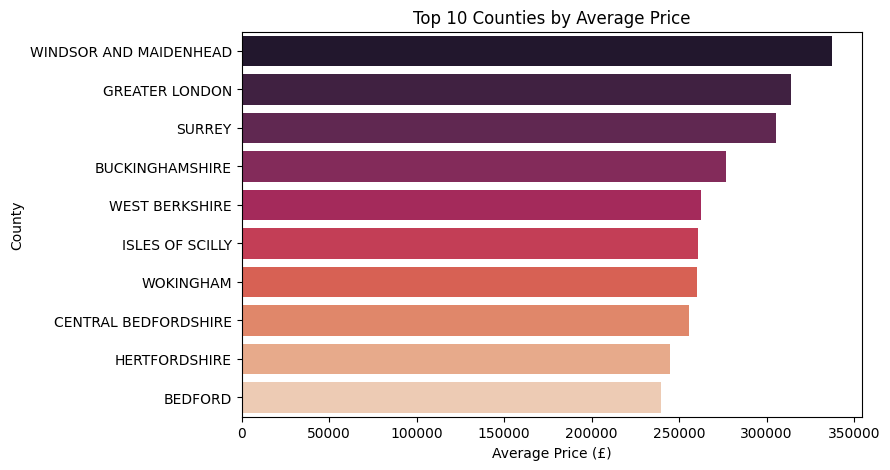

In [5]:
top_counties = df.groupby("county")["price"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_counties.values, y=top_counties.index, palette="rocket")
plt.title("Top 10 Counties by Average Price")
plt.xlabel("Average Price (£)")
plt.ylabel("County")
plt.show()

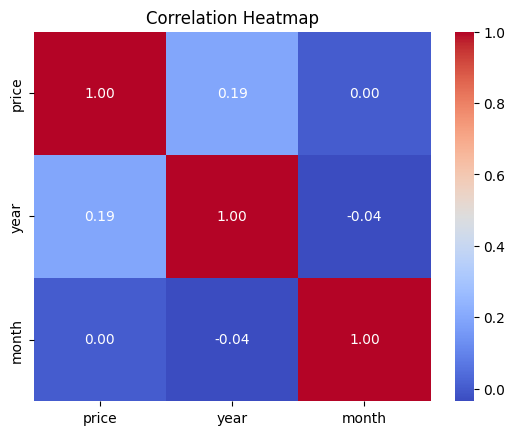

In [6]:
corr = df[["price", "year", "month"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [7]:
df.groupby("year")["price"].mean().to_csv("../data/clean/avg_price_by_year.csv")